In [2]:
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt

%matplotlib inline

### Data file and cleaning 

In [3]:
!unzip homicides_report.zip

Archive:  homicides_report.zip
  inflating: database.csv            


In [4]:
df_mrdr = pd.read_csv('database.csv')
print(df_mrdr.shape)
df_mrdr.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(638454, 24)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [5]:
#File Information:
df_mrdr.info

<bound method DataFrame.info of         Record ID Agency Code  ... Perpetrator Count Record Source
0               1     AK00101  ...                 0           FBI
1               2     AK00101  ...                 0           FBI
2               3     AK00101  ...                 0           FBI
3               4     AK00101  ...                 0           FBI
4               5     AK00101  ...                 1           FBI
...           ...         ...  ...               ...           ...
638449     638450     WY01500  ...                 0           FBI
638450     638451     WY01700  ...                 0           FBI
638451     638452     WY01701  ...                 0           FBI
638452     638453     WY01800  ...                 1           FBI
638453     638454     WY01902  ...                 1           FBI

[638454 rows x 24 columns]>

In [6]:
df_mrdr.dtypes.value_counts()

object    18
int64      6
dtype: int64

In [7]:
df_num = df_mrdr.select_dtypes(include=[float, int])
df_num.columns

Index(['Record ID', 'Year', 'Incident', 'Victim Age', 'Victim Count',
       'Perpetrator Count'],
      dtype='object')

In [8]:
df_str = df_mrdr.select_dtypes(include=[object])
df_str.columns

Index(['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Month',
       'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Record Source'],
      dtype='object')

In [9]:
#missing values? 
df_mrdr.isnull().sum().sort_values()

Record ID                0
Victim Count             0
Weapon                   0
Relationship             0
Perpetrator Ethnicity    0
Perpetrator Race         0
Perpetrator Age          0
Perpetrator Sex          0
Victim Ethnicity         0
Victim Race              0
Victim Age               0
Victim Sex               0
Crime Solved             0
Crime Type               0
Incident                 0
Month                    0
Year                     0
State                    0
City                     0
Agency Type              0
Agency Name              0
Agency Code              0
Perpetrator Count        0
Record Source            0
dtype: int64

In [10]:
df_mrdr.isnull().sum(axis=1).value_counts()

0    638454
dtype: int64

In [11]:
#Replacing spaces with underscore for columns name: 
df_mrdr.columns = df_mrdr.columns.str.replace(' ', '_')

In [12]:
df_mrdr.columns

Index(['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime_Type', 'Crime_Solved',
       'Victim_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Ethnicity',
       'Perpetrator_Sex', 'Perpetrator_Age', 'Perpetrator_Race',
       'Perpetrator_Ethnicity', 'Relationship', 'Weapon', 'Victim_Count',
       'Perpetrator_Count', 'Record_Source'],
      dtype='object')

In [13]:
df_str = df_mrdr.select_dtypes(include=[object])
df_str.columns

Index(['Agency_Code', 'Agency_Name', 'Agency_Type', 'City', 'State', 'Month',
       'Crime_Type', 'Crime_Solved', 'Victim_Sex', 'Victim_Race',
       'Victim_Ethnicity', 'Perpetrator_Sex', 'Perpetrator_Age',
       'Perpetrator_Race', 'Perpetrator_Ethnicity', 'Relationship', 'Weapon',
       'Record_Source'],
      dtype='object')

In [15]:
df_mrdr.nunique()

Record_ID                638454
Agency_Code               12003
Agency_Name                9216
Agency_Type                   7
City                       1782
State                        51
Year                         35
Month                        12
Incident                   1000
Crime_Type                    2
Crime_Solved                  2
Victim_Sex                    3
Victim_Age                  101
Victim_Race                   5
Victim_Ethnicity              3
Perpetrator_Sex               3
Perpetrator_Age             191
Perpetrator_Race              5
Perpetrator_Ethnicity         3
Relationship                 28
Weapon                       16
Victim_Count                 11
Perpetrator_Count            11
Record_Source                 2
dtype: int64

In [16]:
df_mrdr.Weapon.unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [17]:
print(df_mrdr.Perpetrator_Age.nunique())
print(df_mrdr.Perpetrator_Age.unique())

191
[15 42 0 36 27 35 40 49 39 29 19 23 33 26 41 28 61 25 7 17 34 21 43 38 66
 32 37 22 30 24 65 51 60 45 64 18 20 44 73 62 69 52 16 90 56 47 57 31 46
 14 55 50 54 68 77 53 67 48 76 58 71 63 89 13 75 72 93 59 10 11 79 74 99
 70 78 80 9 12 81 6 87 82 83 8 84 85 86 5 3 1 88 95 4 91 92 96 94 2 98 97
 '22' '52' '21' '0' '25' '61' '32' '28' '20' '38' '18' '17' '53' '30' '24'
 '84' '43' '16' '47' '54' '50' '42' '23' '36' '35' '60' '27' '19' '14'
 '57' '63' '81' '31' '58' '51' '15' '40' '33' '26' '41' '29' '34' '37'
 '69' '44' '48' '55' '49' '56' '39' '45' '65' '59' '70' '46' '11' '77'
 '67' '76' '85' '72' '13' '89' '74' '71' '64' '62' '3' '80' '73' '75' '83'
 '78' '68' '66' '86' '87' '95' '90' '6' '12' '99' '88' '9' '93' '10' ' '
 '82' '92' '79' '1']


In [18]:
#replacing tuples to integers:
for i in df_mrdr.Perpetrator_Age.unique():
  if isinstance(i, tuple) or i !=' ':
    df_mrdr.Perpetrator_Age.replace(i, int(float(i)), inplace=True)
    # print(i, type(i))

In [21]:
print(df_mrdr.Perpetrator_Age.nunique())
print(df_mrdr.Perpetrator_Age.unique())

101


array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, ' '],
      dtype=object)

In [19]:

#Replacing space value with 0:
for i in df_mrdr.Perpetrator_Age:
  if i == ' ':
    df_mrdr.Perpetrator_Age.replace(i, 0, inplace=True)
    print(i, type(i))

  <class 'str'>


In [20]:
print(df_mrdr.Perpetrator_Age.nunique())
"n/"
killer_ages = df_mrdr.Perpetrator_Age.unique()
print(sorted(killer_ages))

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [21]:
df_mrdr.nunique()

Record_ID                638454
Agency_Code               12003
Agency_Name                9216
Agency_Type                   7
City                       1782
State                        51
Year                         35
Month                        12
Incident                   1000
Crime_Type                    2
Crime_Solved                  2
Victim_Sex                    3
Victim_Age                  101
Victim_Race                   5
Victim_Ethnicity              3
Perpetrator_Sex               3
Perpetrator_Age             100
Perpetrator_Race              5
Perpetrator_Ethnicity         3
Relationship                 28
Weapon                       16
Victim_Count                 11
Perpetrator_Count            11
Record_Source                 2
dtype: int64

In [22]:
VicAge = df_mrdr.Victim_Age.unique()
print(sorted(VicAge))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 998]


## Data interpertation

Male       494125
Female     143345
Unknown       984
Name: Victim_Sex, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f576a3c80d0>],
      dtype=object)

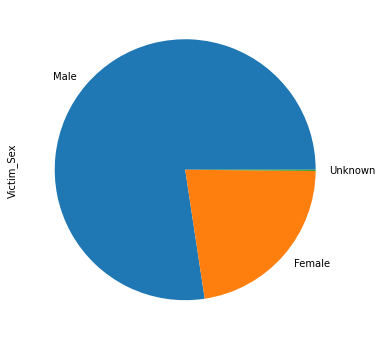

In [94]:
#Killed by Gender
print(df_mrdr.Victim_Sex.value_counts())
df_mrdr.Victim_Sex.value_counts().plot.pie(subplots=True, figsize=(8, 6))

Male       399541
Unknown    190365
Female      48548
Name: Perpetrator_Sex, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f576a2fcb90>],
      dtype=object)

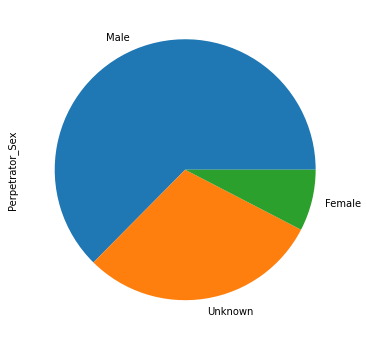

In [95]:
#Killer by Gender
print(df_mrdr.Perpetrator_Sex.value_counts())
df_mrdr.Perpetrator_Sex.value_counts().plot.pie(subplots=True, figsize=(8, 6))

Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f576a1d31d0>],
      dtype=object)

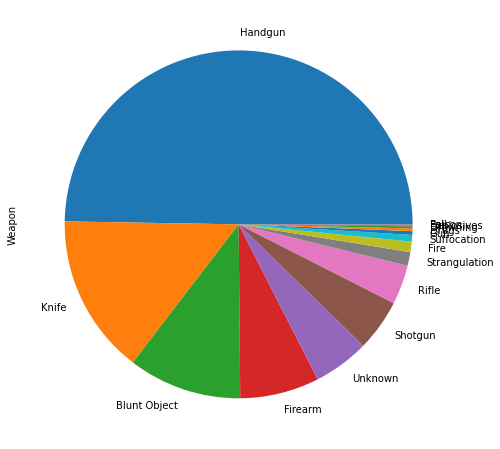

In [98]:
#Weapon types
print(df_mrdr.Weapon.value_counts())
df_mrdr.Weapon.value_counts().plot.pie(subplots=True, figsize=(12, 8))

Yes    448172
No     190282
Name: Crime_Solved, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f576a0e0f10>],
      dtype=object)

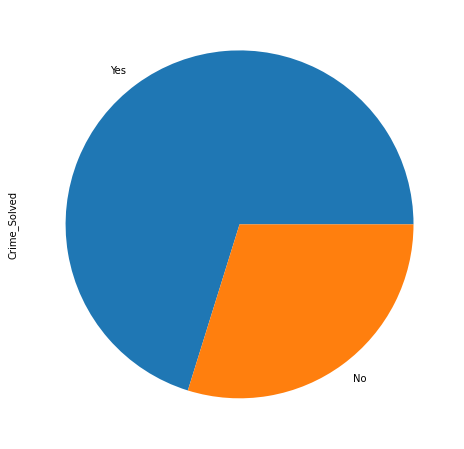

In [100]:
#Solved?
print(df_mrdr.Crime_Solved.value_counts())
df_mrdr.Crime_Solved.value_counts().plot.pie(subplots=True, figsize=(12, 8))

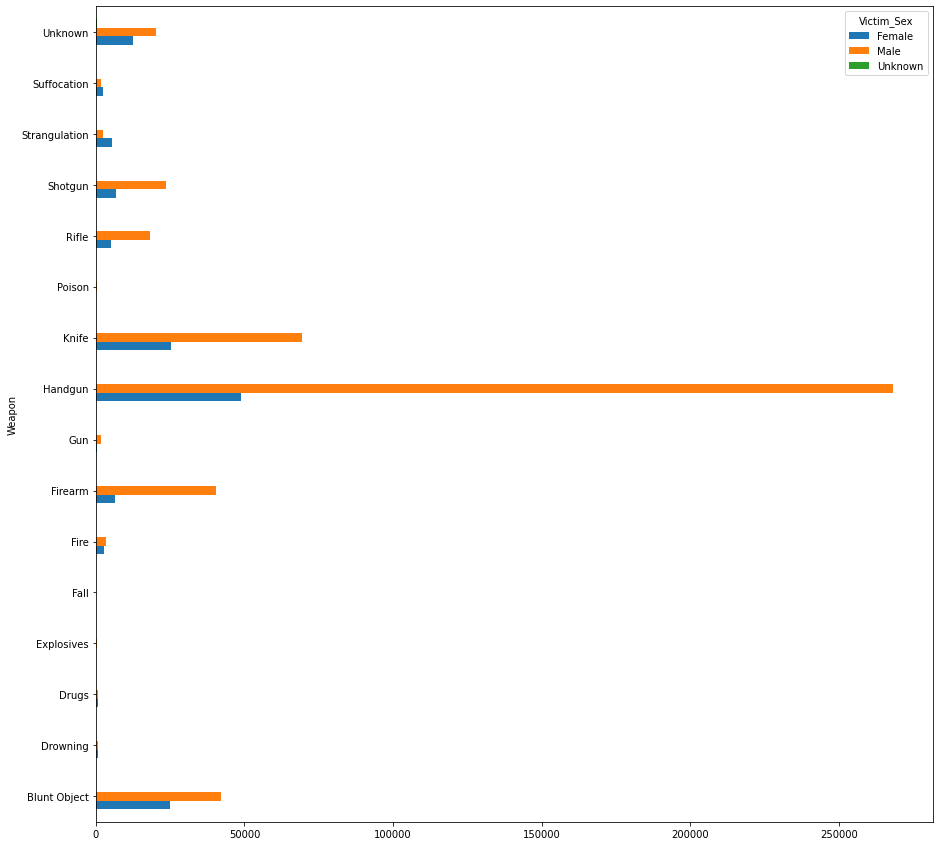

In [34]:
# Weapon by Victim's Sex
df_mrdr.groupby(["Weapon", "Victim_Sex"]).Weapon.count().sort_values(ascending=True).unstack(1).fillna(0).plot.barh(figsize=(15, 15))

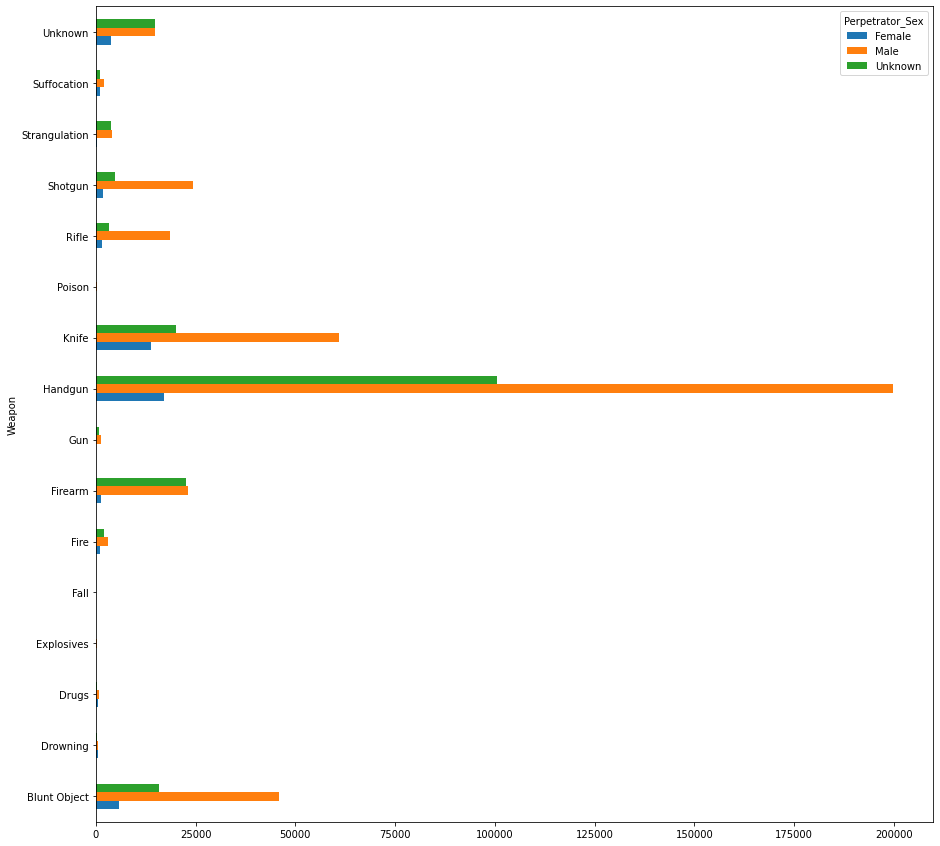

In [60]:
# Weapon by killer's Sex
df_mrdr.groupby(["Weapon", "Perpetrator_Sex"]).Weapon.count().unstack(1).fillna(0).plot.barh(figsize=(15, 15))

Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: Crime_Type, dtype: int64


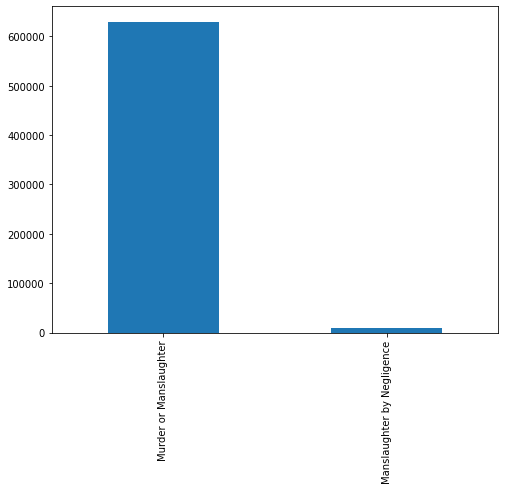

In [87]:
#by purpes or my mistke
print(df_mrdr.Crime_Type.value_counts())
df_mrdr.Crime_Type.value_counts().plot.bar(figsize=(8, 6))

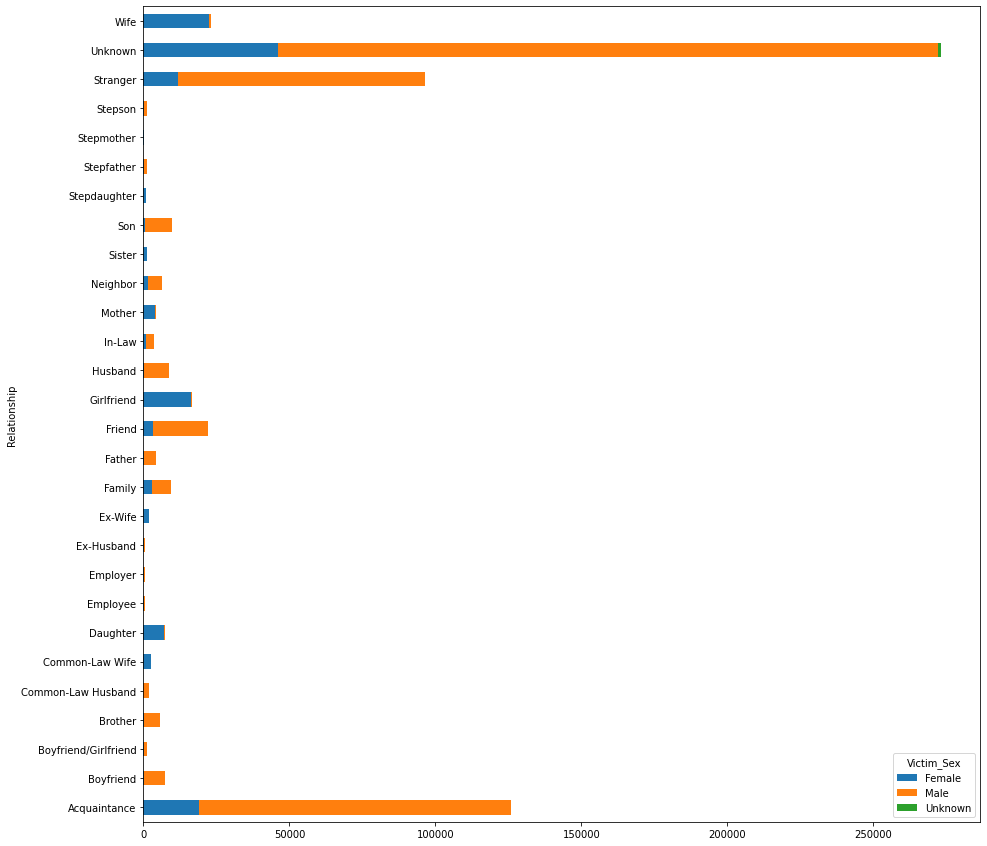

In [69]:
# Relationship by Victim's Sex
Relation = df_mrdr.groupby(["Relationship", "Victim_Sex"]).Victim_Sex.count().unstack(1).fillna(0)
Relation.sort_values(by=["Relationship"])
Relation.plot.barh(figsize=(15, 15),stacked=True)

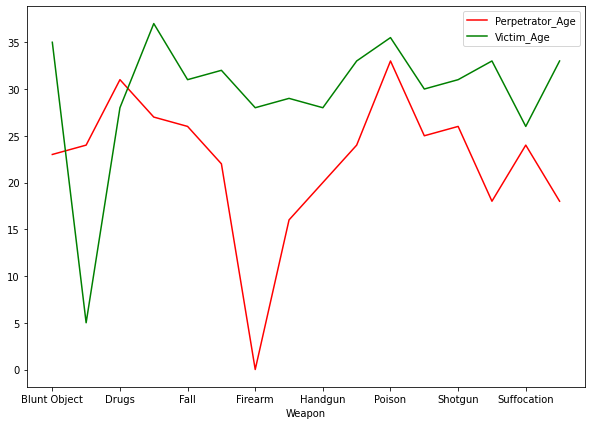

In [72]:
# Median ages of killers and victims by weapon:
df_mrdr.groupby("Weapon").Perpetrator_Age.median().plot(figsize=(10,7),color='red')
df_mrdr.groupby("Weapon").Victim_Age.median().plot(figsize=(10,7),color='green')
plt.legend(['Perpetrator_Age', 'Victim_Age'])

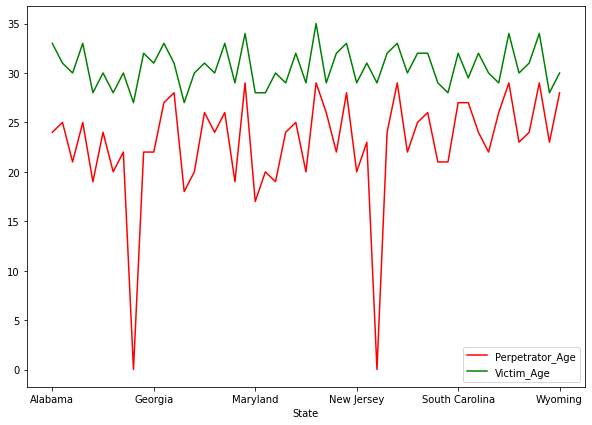

In [73]:
# Median ages of killers and victims by state:
df_mrdr.groupby("State").Perpetrator_Age.median().plot(figsize=(10,7),color='red')
df_mrdr.groupby("State").Victim_Age.median().plot(figsize=(10,7),color='green')
plt.legend(['Perpetrator_Age', 'Victim_Age'])

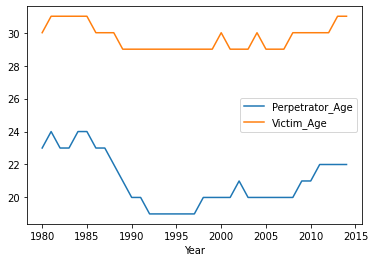

In [33]:
# Median ages of killers and victims by year:
df_mrdr.groupby("Year").Perpetrator_Age.median().plot()
df_mrdr.groupby("Year").Victim_Age.median().plot()
plt.legend(['Perpetrator_Age', 'Victim_Age'])

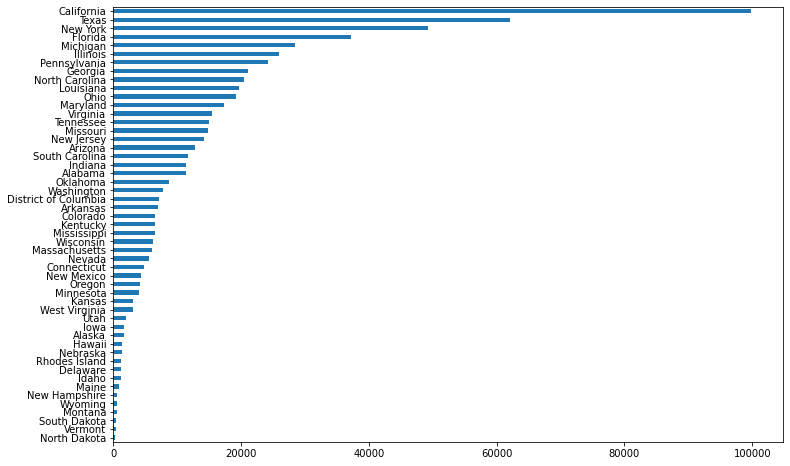

In [42]:
states = df_mrdr.State.value_counts().sort_values(ascending=True)
states
states.plot.barh(figsize=(12, 8))

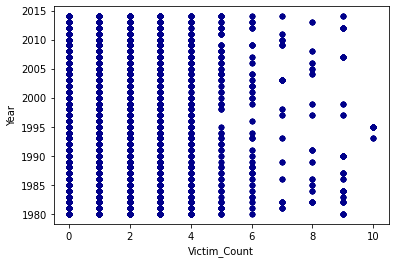

In [32]:
 # Victim_count by Year: 
 ax = df_mrdr.plot.scatter(x="Victim_Count", y="Year", color="DarkBlue")

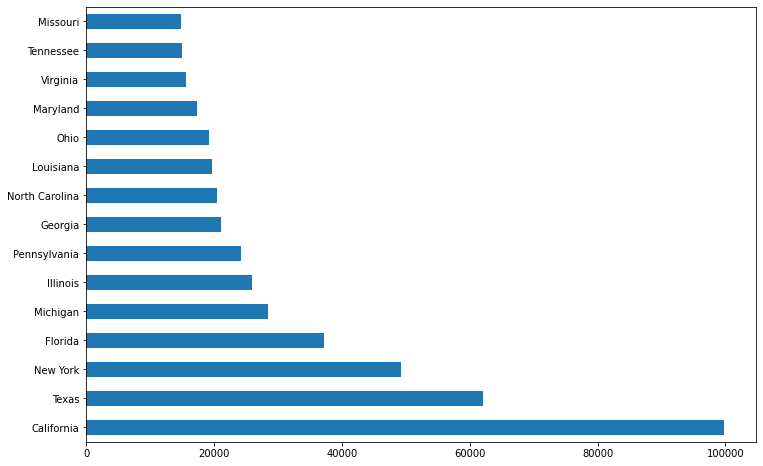

In [ ]:
df_mrdr.State.value_counts().head(15).plot.barh(figsize=(12, 8))

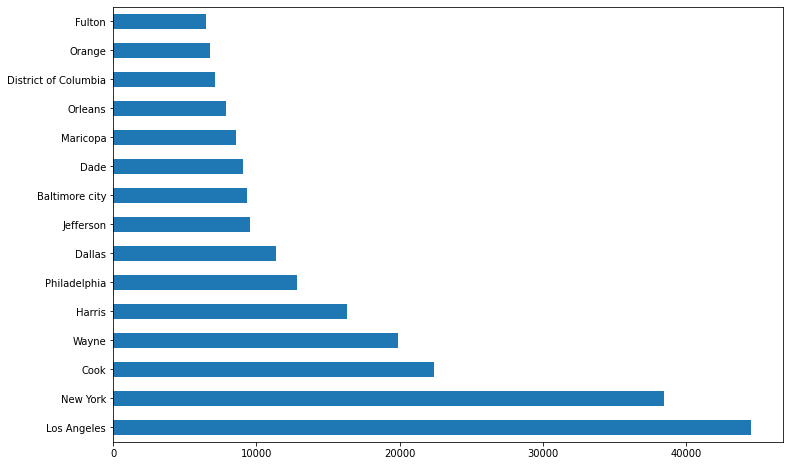

In [ ]:
df_mrdr.City.value_counts().head(15).plot.barh(figsize=(12, 8))